**Manolito Jr. B. Aquino** <br>
**CPE32S8**

## 1. Objectives

This activity aims to introduce students to object detection and recongition through the use of histogram of gradients (HoG), image pyramids and sliding windows in OpenCV.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Demonstrate object detection and recognition using histogram of gradients, image pyramids and sliding windows in OpenCV.
* Evaluate the performance of the object detection and recognition techniques in OpenCV.

## 3. Procedures and Outputs

When it comes to recognizing and detecting objects, there are a number of techniques used in computer vision, which we'll be examining:
* Histogram of Oriented Gradients
* Image pyramids
* Sliding windows

Unlike feature detection algorithms, these are not mutually exclusive techniques, rather, they are complimentary. You can perform a Histogram of Oriented Gradients (HOG) while applying the sliding windows technique. So, let's take a look at HOG first and understand what it is.

### History of Gradients (HoG) Descriptors

HOG is a feature descriptor, so it belongs to the same family of algorithms, such as SIFT, SURF, and ORB.

It is used in image and video processing to detect objects. Its internal mechanism is really clever; an image is divided into portions and a gradient for each portion is calculated. We've observed a similar approach when we talked about face recognition through LBPH.

HOG, however, calculates histograms that are not based on color values, rather, they are based on gradients. As HOG is a feature descriptor, it is capable of delivering the type of information that is vital for feature matching and object detection/recognition.

Before diving into the technical details of how HOG works, let's first take a look at how HOG sees the world; here is an image of a truck:

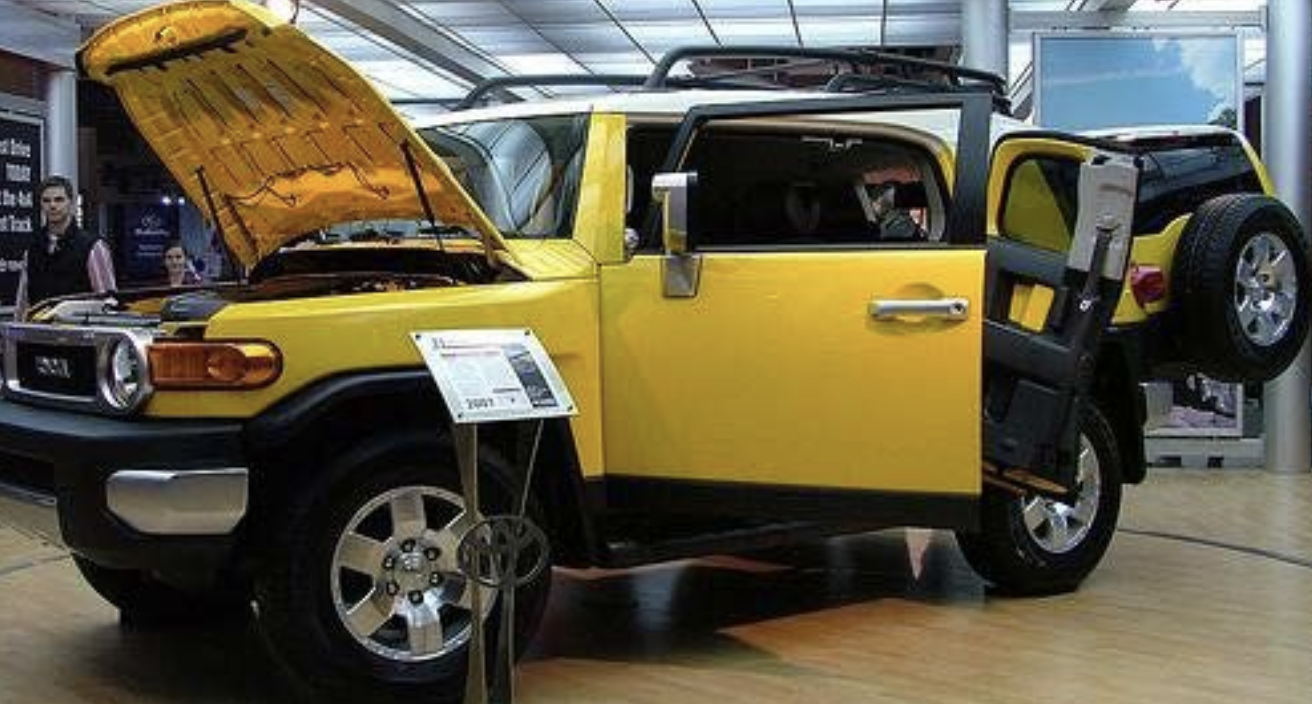

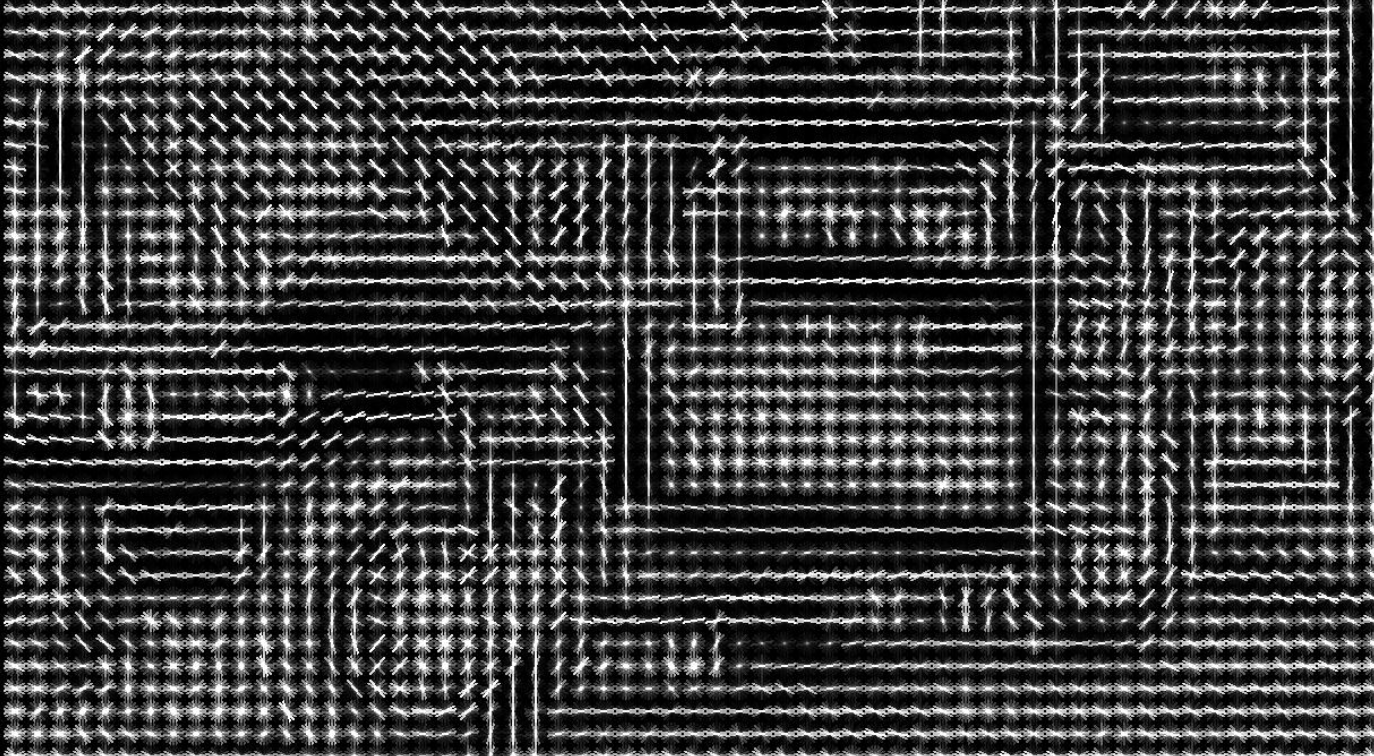

**Question: Here you are shown the original image and how HOG sees the image. Analyze the output and provide a description. Are you able to see that it is the same image?**

***- In basic words, HOG extracts features from an image and converts it to values that are more understandable by the computer. It still resembles the original picture and still could be identified.***

The extrapolation of histograms into descriptors is quite a complex process.
- First, local histograms for each cell are calculated. The cells are grouped into larger regions called blocks. These blocks can be made of any number of cells, but Dalal and Triggs found that 2x2 cell blocks yielded the best results when performing people detection.
- A block-wide vector is created so that it can be normalized, accounting for variations in illumination and shadowing (a single cell is too small a region to detect such variations). This improves the accuracy of detection as it reduces the illumination and shadowing difference between the sample and the block being examined.
- Simply comparing cells in two images would not work unless the images are identical (both in terms of size and data).

There are two main problems to resolve:
1. Location
2. Scale

**The Scale Issue**

Imagine, for example, if your sample was a detail (say, a bike) extrapolated from a larger image, and you're trying to compare the two pictures. You would not obtain the same gradient signatures and the detection would fail (even though the bike is in both pictures).

**The Location Issue**

Once we've resolved the scale problem, we have another obstacle in our path: a potentially detectable object can be anywhere in the image, so we need to scan the entire image in portions to make sure we can identify areas of interest, and within these areas, try to detect objects. Even if a sample image and object in the image are of identical size, there needs to be a way to instruct OpenCV to locate this object. So, the rest of the image is discarded and a comparison is made on potentially matching regions.

*To obviate these problems, we need to familiarize ourselves with the concepts of image pyramid and sliding windows.*

### Image Pyramids

Many of the algorithms used in computer vision utilize a concept called pyramid. An image pyramid is a multiscale representation of an image. This diagram should
help you understand this concept:

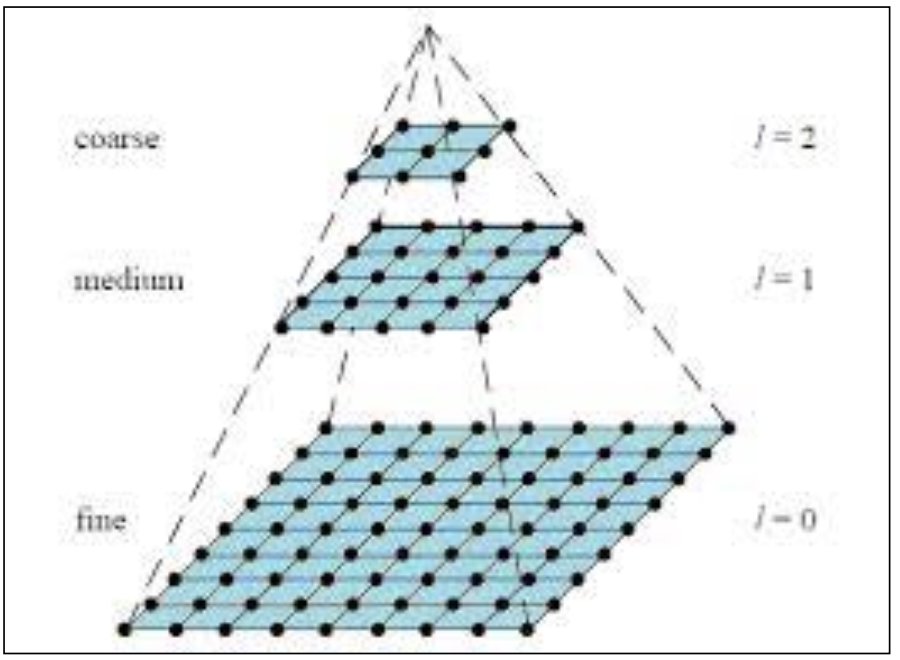

A multiscale representation of an image, or an image pyramid, helps you resolve the problem of detecting objects at different scales. The importance of this concept is easily explained through real-life hard facts, such as it is extremely unlikely that an object will appear in an image at the exact scale it appeared in our sample image.
Moreover, you will learn that object classifiers (utilities that allow you to detect objects in OpenCV) need training, and this training is provided through image databases made up of positive matches and negative matches. Among the positives, it is again unlikely that the object we want to identify will appear in the same scale throughout the training dataset.

**Follow the steps and create a function that can make an image Pyramid**:

1. Take an image.
2. Resize (smaller) the image using an arbitrary scale parameter.
3. Smoothen the image (using Gaussian blurring).
4. If the image is larger than an arbitrary minimum size, repeat the process from step 1.

Demonstrate by creating a function and showing the different scales of the image.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


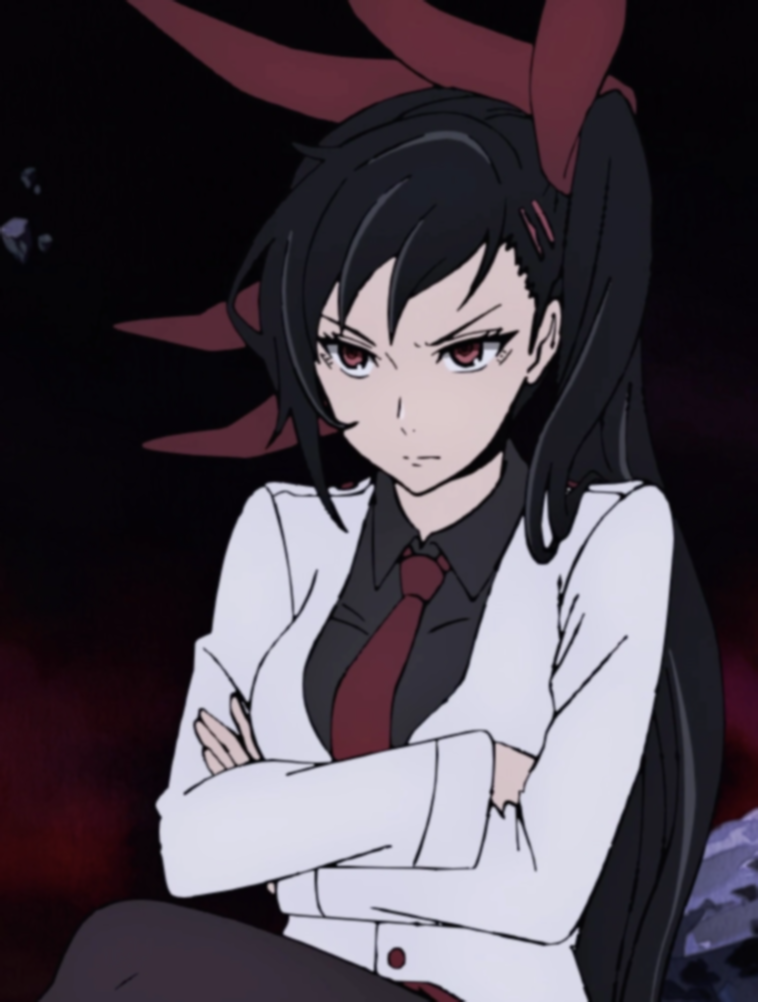

501 379


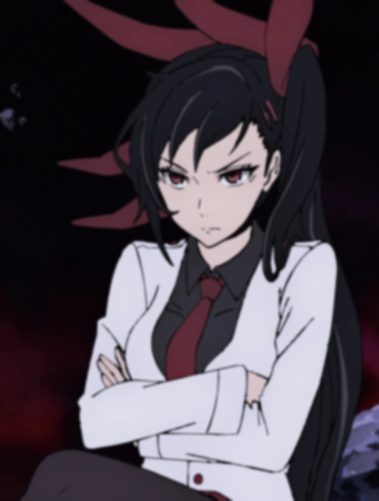

250 189


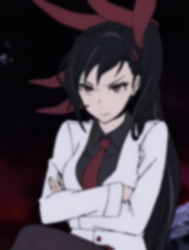

125 94


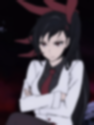

62 47


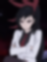

31 23


(31, 23, 3)

In [46]:
image = cv2.imread('/content/drive/MyDrive/images/download.png')
ARB_SCALE_PARAM = 0.5
MIN_SIZE = (30, 30)

while image.shape[0] > MIN_SIZE[0] and image.shape[1] > MIN_SIZE[1]:
  cv2_imshow(image)
  image = cv2.resize(image, (int(image.shape[1]*ARB_SCALE_PARAM), int(image.shape[0]*ARB_SCALE_PARAM)))
  image = cv2.GaussianBlur(image, (5, 5), 0)
  print(image.shape[0], image.shape[1])

image.shape

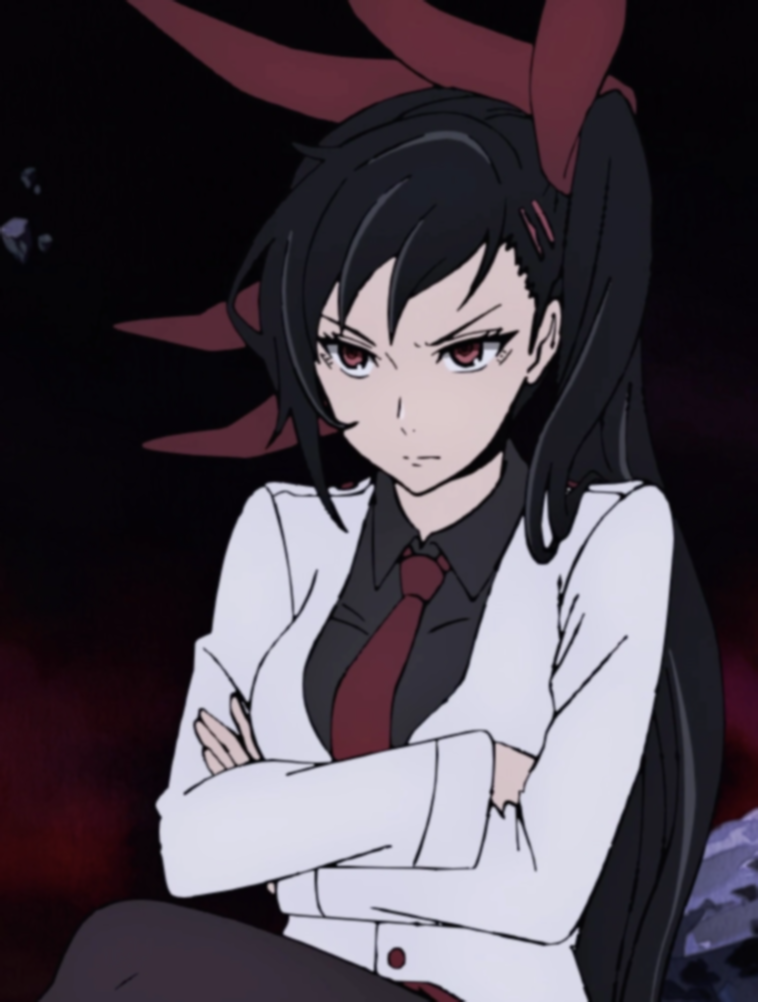

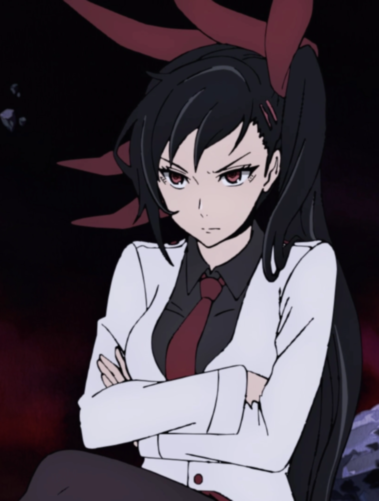

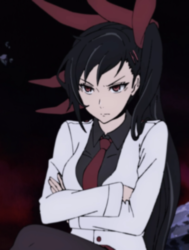

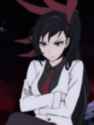

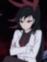

In [45]:
import cv2
import numpy as np

def image_pyramid(image, scale=0.5, min_size=(30, 30)):
    yield image

    while True:
        # Resize the image
        width = int(image.shape[1] * scale)
        height = int(image.shape[0] * scale)
        image = cv2.resize(image, (width, height))

        # Check if the resized image is below the minimum size
        if width < min_size[0] or height < min_size[1]:
            break

        # Yield the resized and smoothed image
        yield image
        image = cv2.GaussianBlur(image, (5, 5), 0)

# Load an example image
image_path = '/content/drive/MyDrive/images/download.png'
original_image = cv2.imread(image_path)

# Create an image pyramid with scale=0.5 and minimum size=(30, 30)
scale_factor = 0.5
minimum_size = (30, 30)
pyramid = image_pyramid(original_image, scale=scale_factor, min_size=minimum_size)

# Display the different scales of the image pyramid
for i, scaled_image in enumerate(pyramid):
    cv2_imshow(scaled_image)

**Question: How does the performance of your functions in obtaining the image pyramid perform in iterations of the image that decrease until the scale factor is achieved?**

*-To be completely honest I was not able to obeserve any performance issue in iterations because it was processed fast. Though we can observe that the images gets a little blurry over multiple iterations.*

### Sliding Windows

Sliding windows is a technique used in computer vision that consists of examining the shifting portions of an image (sliding windows) and operating detection on those using image pyramids. This is done so that an object can be detected at a multiscale level.

Sliding windows resolves location issues by scanning smaller regions of a larger image, and then repeating the scanning on different scales of the same image.

With this technique, each image is decomposed into portions, which allows discarding portions that are unlikely to contain objects, while the remaining portions are classified.

There is one problem that emerges with this approach, though: **overlapping regions**.

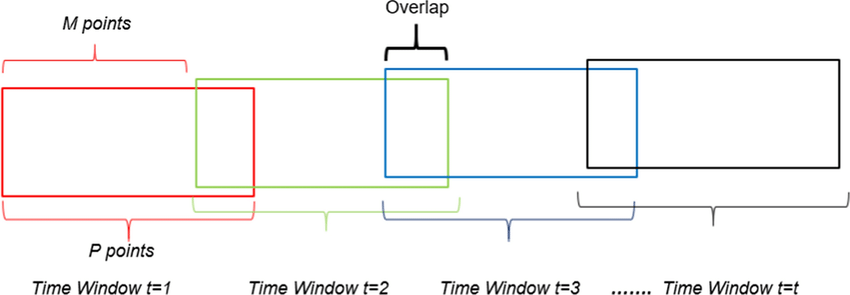

Here's where non-maximum suppression comes into play: given a set of overlapping regions, we can suppress all the regions that are not classified with the maximum score.

**Question: Research on the topic and provide ample discussion, what is non-maximum (or non-maxima) suppression? Provide examples and code.**

The general approach behind non-maximum suppression is as follows:
1. Once an image pyramid has been constructed, scan the image with the sliding window approach for object detection.
2. Collect all the current windows that have returned a positive result (beyond a certain arbitrary threshold), and take a window, W, with the highest response.
3. Eliminate all windows that overlap W significantly.
4. Move on to the next window with the highest response and repeat the
process for the current scale.

**Question: Demonstrate the above given steps using a custom image and creating code in Python using OpenCV**

## 4. Supplementary Activity

Perform **People Detection** using the aforementioned methods.

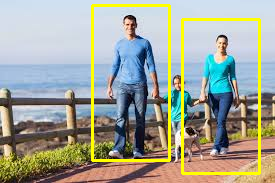

In [33]:
import cv2
import numpy as np

def is_inside(o, i):
  ox, oy, ow, oh = o
  ix, iy, iw, ih = i
  return ox > ix and oy > iy and ox + ow < ix + iw and oy + oh < iy + ih

def draw_person(image, person):
  x, y, w, h = person
  cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 255), 2)

img = cv2.imread("/content/drive/MyDrive/images/images.jpg")
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
found, w = hog.detectMultiScale(img)
found_filtered = []

for ri, r in enumerate(found):
  for qi, q in enumerate(found):
    if ri != qi and is_inside(r, q):
      break
    else:
      found_filtered.append(r)
for person in found_filtered:
  draw_person(img, person)

cv2_imshow(img)


Your output should display bounding boxes around people detected. Your task is:
* Debug the code if your intended output is not being displayed.
* Enumerate the problems encountered and actions taken.
* Evaluate the performance of the object detection technique.



***-This function was able to detect two people that was in the picture, It was not able to detect the child present. It was also quite a bit difficult to look for images that I can use for this activity due to the fact that most of websites are blockd in TIP computers.***

## 5. Summary, Conclusions and Lessons Learned

***-This activity gave me idea regarding how computer vision works in python. I gained knowledge regarding History of Gradients Descriptors and how significant it is in object detedction and recognition techniques. This also talked about the pyramid solution which solves the issue regarding the scale and location of an image.***

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*